# Práctica 3: Modelo dinámico inverso de un robot y planteamiento de trayectoria

## Objetivo

Que el alumno resuelva la dinámica inversa de un manipulador serial, calculando el par necesario para desplazar el efector final de un punto inicial a un punto final a lo largo de una trayectoria lineal.


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno aplique un modelo de dinámica inversa a través del método de Euler Lagrange para calcular los pares en las juntas del robot
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
|------| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>

| Elemento | Malo | Regular | Bueno |
| :------| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Modelo dinámico
El modelo dinámico de un sistema permite analizar el movimiento del cuerpo atendiendo a las causas que lo originan (fuerzas y pares)
En particular, para un manipulador serial, permite relacionar el par aplicado en las juntas de un robot con la posición del efector final, considerando fenómenos como la masa y la inercia.

### Modelo dinámico inverso
El modelo dinámico inverso permite conocer la posición del efector final en términos de los pares de las juntas. Para esto, se pueden tomar dos aproximaciones

### Ecuaciones de propagación
Las ecuaciones de propagación de velocidad permiten relacionar cómo el comportamiento de un eslabón dentro de una cadena cinemática afecta a los otros eslabones dentro de la cadena. Se puede analizar la propagación de las fuerzas y de la velocidad dentro de una cadena.

### Modelo Newton-Euler
Las ecuaciones de Newton-Euler relacionan la cantidad de movimiento lineal y angular con las fuerzas y pares a los que es sometido cada uno de los eslabones

### Modelo Euler-Lagrange
El modelo de Euler-Lagrange permite relacionar la energía cinética y potencial con las perturbaciones dentro de un sistema, a través del principio de mínima acción. 

# Cuestionario previo

**Instrucciones:** Responder de forma breve las siguientes preguntas.

---

## ¿Qué es el análisis de dinámica inversa y qué nos permite obtener?

El **análisis de dinámica inversa** consiste en determinar los **esfuerzos o torques (pares de fuerza)** necesarios en cada articulación de un robot manipulador para que este siga una **trayectoria deseada de movimiento** (posición, velocidad y aceleración) del efector final.

Este análisis es crucial para el **control de movimiento**, ya que nos permite calcular las fuerzas que deben aplicarse para compensar efectos como la **inercia, gravedad, fricción y fuerzas externas**.

**En resumen, la dinámica inversa nos permite:**

* Calcular los **pares o fuerzas articulares** requeridos para seguir una trayectoria especificada.
* Considerar la **dinámica completa del sistema** (masas, aceleraciones, etc.).
* Diseñar **controladores más precisos** y eficientes.

Este análisis es opuesto al de **dinámica directa**, en el cual, conocidos los torques y fuerzas aplicadas, se calculan las aceleraciones y movimientos resultantes.

---

## ¿A través de qué modelados se puede realizar un análisis de dinámica inversa?

El análisis de dinámica inversa se puede realizar a través de varios **modelos físicos y matemáticos** del robot manipulador. Los principales son:

### 1. Formalismo de Euler-Lagrange

* Se basa en la energía cinética y potencial del sistema.
* Es útil para sistemas con múltiples grados de libertad.
* Proporciona ecuaciones más compactas y adecuadas para automatización simbólica.

### 2. Formalismo de Newton-Euler

* Se fundamenta en las leyes de Newton para cuerpos rígidos.
* Requiere el análisis de fuerzas y torques por eslabón.
* Es eficiente computacionalmente y adecuado para simulaciones dinámicas.

### 3. Modelado mediante software de simulación (CAD/CAE)

* Herramientas como MATLAB/Simulink, ROS o Gazebo permiten obtener modelos dinámicos con visualización.
* Integran librerías que automatizan cálculos de dinámica inversa.

Cada enfoque tiene ventajas dependiendo de la **complejidad del robot**, la **precisión deseada** y los **recursos computacionales** disponibles.

---

## ¿De qué condiciones o fenómenos físicos dependen los pares en las juntas de un robot para seguir una trayectoria?

Los **pares (torques)** necesarios en las articulaciones para que un robot siga una trayectoria dependen de múltiples **condiciones y fenómenos físicos**. Entre los principales se encuentran:

* **Inercia de los eslabones**: La masa y distribución de masa de cada segmento afectan los requerimientos de torque durante aceleraciones.
* **Gravedad**: Se debe compensar el peso de los eslabones, especialmente en configuraciones verticales.
* **Fricción interna**: La fricción en engranajes o actuadores introduce resistencia al movimiento.
* **Fuerzas externas**: Como contactos con el entorno, cargas útiles o fuerzas de interacción.
* **Velocidad y aceleración deseadas**: A mayor rapidez o aceleración, mayor será el torque necesario.
* **Configuración geométrica del robot**: Algunas posiciones generan desventajas mecánicas que incrementan el torque requerido.

---

## ¿Cómo se aplica la derivada total de una función que está en términos de otras variables que a su vez están en términos de la variable respecto a la que se realiza la derivada total?

La **derivada total** se aplica cuando una función depende de varias variables intermedias que, a su vez, dependen de una variable principal. Es útil en cinemática y dinámica, por ejemplo, al derivar funciones que dependen del tiempo de forma implícita.

### Regla de la cadena para derivadas totales:

Si una función \\( f \\) depende de \\( x \\) e \\( y \\), y ambos dependen de \\( t \\), la derivada total de \\( f \\) respecto a \\( t \\) es:

$$
\frac{df}{dt} = \frac{\partial f}{\partial x} \cdot \frac{dx}{dt} + \frac{\partial f}{\partial y} \cdot \frac{dy}{dt}
$$

Esto se extiende a más variables:

$$
\frac{df}{dt} = \sum_i \frac{\partial f}{\partial x_i} \cdot \frac{dx_i}{dt}
$$

### Aplicación en robótica:

Se usa, por ejemplo, para calcular:

* **Velocidad** del efector final a partir de velocidades articulares.
* **Aceleraciones** necesarias para control dinámico.

Esta herramienta matemática es clave en el **análisis de movimiento dependiente del tiempo**.


## Desarrollo

### 1. Planteamiento de la cinemática inversa y obtención de la trayectoria
En esta primera parte, se realiza el análisis de la cinemática inversa, que permite obtener las posiciones, velocidades y aceleraciones de las juntas del robot, dada **una posición inicial de las juntas y una posición final del efector final**. Se puede retomar de la práctica anterior. 
Un diagrama del robot se muestra en la imagen:

<img src="images/p3_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Muestreando trayectoria
Calculando cinematica inversa
Calculando puntos


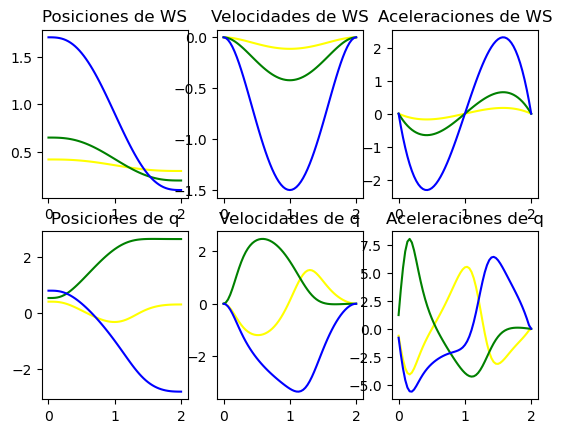

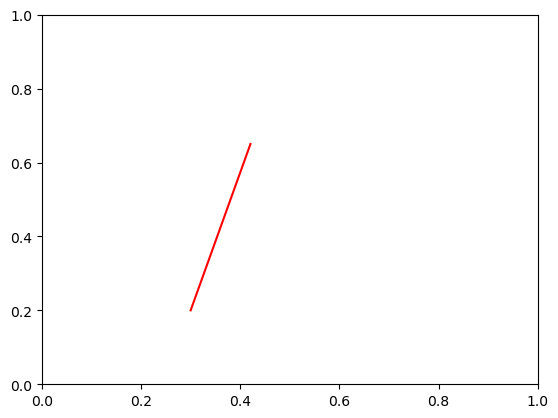

In [1]:
from generador_trayectoria_p2 import GeneradorTrayectoria
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

def main():
  generador_trayectoria = GeneradorTrayectoria()
  generador_trayectoria.cinematica_directa()
  generador_trayectoria.generar_trayectoria()
  generador_trayectoria.cinematica_inversa()
  generador_trayectoria.graficar()
  generador_trayectoria.graficar_ws()

if __name__ == "__main__":
  main()

### 2. Planteamiento de la dinámica inversa

### a) Planteamiento de la dinámica inversa: Matrices de inercia

Calcular las matrices de inercia de los eslabones considerando que su centro de masa concide con su centroide y constan de un prisma con las dimensiones usadas en el archivo URDF del robot.

In [2]:
class GeneradorDinamica(GeneradorTrayectoria):
  def __init__(self):
    super().__init__()
  def matriz_inercia(self, lx, ly, lz, masa):
    return Matrix([[(masa/12.0)*(ly**2 + lz**2), 0, 0], 
                  [0, (masa/12.0)*(lx**2 + lz**2), 0], 
                  [0, 0, (masa/12.0)*(lx**2 + ly**2)]])

### b) Planteamiento de la dinámica inversa: Posiciones de los centros de masa
A partir de las matrices de transformación homogénea, obtener la posición de los centros de masa de los eslabones.

In [3]:
  def definir_inercia(self, masas = [0.25, 0.25, 0.25]):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    # Transformaciones de centros de masa
    self.T_1_C1 = self.trans_homo(self.dim[0] / 2, 0, 0, 0, 0, 0)
    self.T_2_C2 = self.trans_homo(self.dim[1] / 2, 0, 0, 0, 0, 0)
    self.T_3_C3 = self.trans_homo(self.dim[2] / 2, 0, 0, 0, 0, 0)
    self.T_0_C1 = simplify(self.T_0_1 * self.T_1_C1)
    self.T_0_C2 = simplify(self.T_0_2 * self.T_2_C2)
    self.T_0_C3 = simplify(self.T_0_3 * self.T_3_C3)
    #Vectores de posición de sistemas de referencia
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_1_2 = self.T_1_2[:3, 3]
    self.p_2_3 = self.T_2_3[:3, 3]
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_0_2 = self.T_0_2[:3, 3]
    self.p_0_3 = self.T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    self.p_1_C1 = self.T_1_C1[:3, 3]
    self.p_2_C2 = self.T_2_C2[:3, 3]
    self.p_3_C3 = self.T_3_C3[:3, 3]
    self.p_0_C1 = self.T_0_C1[:3, 3]
    self.p_0_C2 = self.T_0_C2[:3, 3]
    self.p_0_C3 = self.T_0_C3[:3, 3]
    #Rotaciones
    self.R_0_1 = self.T_0_1[:3, :3]
    self.R_1_2 = self.T_1_2[:3, :3]
    self.R_2_3 = self.T_2_3[:3, :3]
    self.Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 

    # Variables de velocidad angular
    self.theta_0_1_dot = Symbol('theta_0_1_dot')
    self.theta_1_2_dot = Symbol('theta_1_2_dot')
    self.theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    self.theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    self.theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    self.theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    # Masas
    self.m1 = masas[0]
    self.m2 = masas[1]
    self.m3 = masas[2]
    # Matrices de inercia
    self.Ic1 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m1)
    self.Ic2 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m2)
    self.Ic3 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m3)
    #Gravedad
    self.g = -9.81

GeneradorDinamica.definir_inercia= definir_inercia

### c) Planteamiento de la dinámica inversa: Velocidades de los centros de masa

A partir de las ecuaciones de propagación de la velocidad, obtener la velocidad lineal y angular de los centros de masa de los eslabones.

In [4]:
 def generar_esfuerzos(self):
    #Velocidades angulares de sistemas
    omega_1_1 = Matrix([0, 0, self.theta_0_1_dot])
    omega_2_2 = self.R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, self.theta_1_2_dot])
    omega_3_3 = self.R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, self.theta_2_3_dot]) 
    #Velocidades angulares de centros de masa
    omega_1_C1 = omega_1_1
    omega_2_C2 = omega_2_2
    omega_3_C3 = omega_3_3
    omega_1_C1_f = lambdify([self.theta_0_1_dot], omega_1_C1)
    omega_2_C2_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot], omega_2_C2)
    omega_3_C3_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3], omega_3_C3)
    #Velocidades lineales de sistemas
    v_1_1 = Matrix([0, 0, 0])
    v_2_2 = self.R_1_2.transpose() @ (v_1_1 + omega_1_1.cross(self.p_1_2))
    v_3_3 = self.R_2_3.transpose() @ (v_2_2 + omega_2_2.cross(self.p_2_3))
    #Velocidades lineales de centros de masa
    v_1_C1 = v_1_1 + omega_1_C1.cross(self.p_1_C1)
    v_2_C2 = v_2_2 + omega_2_C2.cross(self.p_2_C2)
    v_3_C3 = v_3_3 + omega_3_C3.cross(self.p_3_C3)
    v_1_C1_f = lambdify([self.theta_0_1, self.theta_0_1_dot], v_1_C1)
    v_2_C2_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot], v_2_C2)
    v_3_C3_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot, self.theta_2_3, self.theta_2_3_dot], v_3_C3)

    #Arreglos para guardar velocidades angulares
    # 3 filas, n columnas (cada columna es una velocidad angular del centro de masa en un instante)
    self.omega_1_C1_m = Matrix.zeros(3, self.muestras)
    self.omega_2_C2_m = Matrix.zeros(3, self.muestras)
    self.omega_3_C3_m = Matrix.zeros(3, self.muestras)
    #Arreglos para guardar velocidades lineales
    # 3 filas, n columnas (cada columna es una velocidad lineal del centro de masa en un instante)
    self.vel_1_C1_m = Matrix.zeros(3, self.muestras)
    self.vel_2_C2_m = Matrix.zeros(3, self.muestras)
    self.vel_3_C3_m = Matrix.zeros(3, self.muestras)
    #Ciclo para todas las muestras
    print("Calculando velocidades")
    for i in range(self.muestras):
      #Velocidades angulares
      self.omega_1_C1_m[:, i] = omega_1_C1_f(self.q_dot_m[0, i])
      self.omega_2_C2_m[:, i] = omega_2_C2_f(self.q_dot_m[0, i], self.q_dot_m[1, i])
      self.omega_3_C3_m[:, i] = omega_3_C3_f(self.q_dot_m[0, i], self.q_dot_m[1, i], self.q_dot_m[2, i])
      
      #Velocidades lineales
      """self.vel_1_C1_m[:, i] = v_1_C1_f(self.q_m[0, i], self.q_dot_m[0, i])
      self.vel_2_C2_m[:, i] = v_2_C2_f(self.q_m[0, i], self.q_dot_m[0, i], self.q_m[1, i], self.q_dot_m[1, i])
      self.vel_3_C3_m[:, i] = v_3_C3_f(self.q_m[0, i], self.q_dot_m[0, i], self.q_m[1, i], self.q_dot_m[1, i], self.q_m[2, i], self.q_dot_m[2, i])
      """
      self.vel_1_C1_m[:, i] = v_1_C1.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i]
      })
      self.vel_2_C2_m[:, i] = v_2_C2.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i],
        self.theta_1_2:     self.q_m[1, i],
        self.theta_1_2_dot: self.q_dot_m[1, i]
      })
      self.vel_3_C3_m[:, i] = v_2_C2.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i],
        self.theta_1_2:     self.q_m[1, i],
        self.theta_1_2_dot: self.q_dot_m[1, i],
        self.theta_2_3:     self.q_m[2, i],
        self.theta_2_3_dot: self.q_dot_m[2, i]
      })

GeneradorDinamica.generar_esfuerzos = generar_esfuerzos

### d) Cálculo del Lagrangiano
Para calcular el Lagrangiano, calcular también las energías cinética y potencial de cada eslabón, y sumarlas. 

In [5]:
  def lagrangiano(self):
    #Euler-Lagrange
    #Energía cinética
    k1 = 0.5 * self.m1 * v_1_C1.dot(v_1_C1) + 0.5 * omega_1_C1.dot(self.Ic1@omega_1_C1)
    k2 = 0.5 * self.m2 * v_2_C2.dot(v_2_C2) + 0.5 * omega_2_C2.dot(self.Ic2@omega_2_C2)
    k3 = 0.5 * self.m3 * v_3_C3.dot(v_3_C3) + 0.5 * omega_3_C3.dot(self.Ic3@omega_3_C3)
    k = k1 + k2 + k3
    #Energía potencial
    u1 = - self.m1 * Matrix([0, 0, self.g]).dot(self.p_0_C1)
    u2 = - self.m2 * Matrix([0, 0, self.g]).dot(self.p_0_C2)
    u3 = - self.m3 * Matrix([0, 0, self.g]).dot(self.p_0_C3)
    u = u1 + u2 + u3
    #Lagrangiano
    La = k - u

GeneradorDinamica.lagrangiano = lagrangiano

### e) Pares en las juntas
Para calcular los pares en las juntas del robot, calcular las parciales del Lagrangiano respecto a las variables que lo componen, y sustituirlas en la ecuación de Euler-Lagrange.

In [6]:
  def pares_juntas(self):
    #Derivadas respecto al espacio de trabajo
    La_dot_q = Matrix([diff(La, self.theta_0_1), 
                       diff(La, self.theta_1_2), 
                       diff(La, self.theta_2_3)])
    #Derivadas respecto a la derivada del espacio de trabajo
    La_dot_q_dot = Matrix([diff(La, self.theta_0_1_dot), 
                            diff(La, self.theta_1_2_dot), 
                            diff(La, self.theta_2_3_dot)])
    #Derivada total
    La_dot_q_dot_dt = diff(La_dot_q_dot, self.theta_0_1) * self.theta_0_1_dot + diff(La_dot_q_dot, self.theta_1_2) * self.theta_1_2_dot + diff(La_dot_q_dot, self.theta_2_3) * self.theta_2_3_dot     + diff(La_dot_q_dot, self.theta_0_1_dot) * self.theta_0_1_dot_dot + diff(La_dot_q_dot, self.theta_1_2_dot) * self.theta_1_2_dot_dot + diff(La_dot_q_dot, self.theta_2_3_dot) * self.theta_2_3_dot_dot
    #Pares en las juntas
    tau = La_dot_q_dot_dt - La_dot_q
    tau_f = lambdify([self.theta_0_1, self.theta_1_2, self.theta_2_3, 
                      self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3_dot, 
                      self.theta_0_1_dot_dot, self.theta_1_2_dot_dot, self.theta_2_3_dot_dot], tau)
    #Generar valores numéricos
    self.tau_val = Matrix.zeros(3, self.muestras)
    #Ciclo para todas las muestras
    print("Calculando pares")
    for i in range(self.muestras):
      self.tau_val[:, i] = tau.subs({self.theta_0_1 : self.q_m[0, i], self.theta_1_2: self.q_m[1, i], self.theta_2_3 : self.q_m[2, i],
                            self.theta_0_1_dot:self.q_dot_m[0, i], self.theta_1_2_dot:self.q_dot_m[1, i], self.theta_2_3_dot:self.q_dot_m[2, i], 
                            self.theta_0_1_dot_dot:self.q_dot_dot_m[0, i], self.theta_1_2_dot_dot:self.q_dot_dot_m[1, i], self.theta_2_3_dot_dot:self.q_dot_dot_m[2, i]})
GeneradorDinamica.pares_juntas = pares_juntas

### 3. Gráficas de pares en las juntas
Graficar los resultados obtenidos en el punto anterior.

In [7]:
  def graficar_esfuerzos(self):
    fig, ((tau_1_g, tau_2_g, tau_3_g)) = plt.subplots(nrows=1, ncols = 3)
    # Posiciones ws
    tau_1_g.set_title("Esfuerzo junta 1")
    tau_1_g.plot(self.t_m.T, self.tau_val[0, :].T, color = "YELLOW")

    # Velocidades ws
    tau_2_g.set_title("Esfuerzo junta 2")
    tau_2_g.plot(self.t_m.T, self.tau_val[1, :].T, color = "GREEN")

    # Aceleraciones ws
    tau_3_g.set_title("Esfuerzo junta 3")
    tau_3_g.plot(self.t_m.T, self.tau_val[2, :].T, color = "BLUE")
    plt.show()
      
GeneradorDinamica.graficar_esfuerzos= graficar_esfuerzos


Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Muestreando trayectoria
Calculando cinematica inversa
Calculando puntos


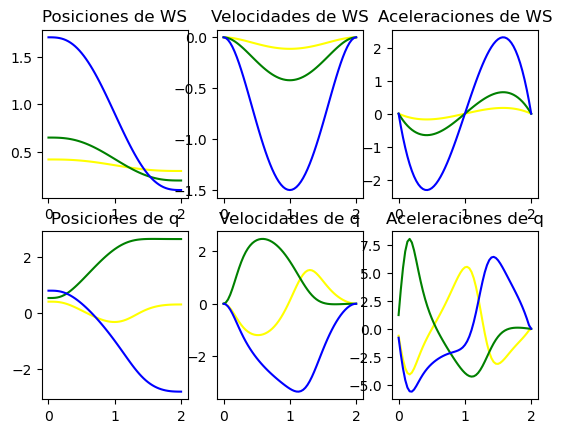

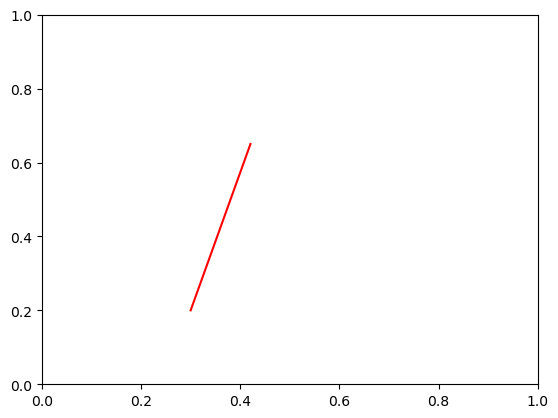

Calculando velocidades


AttributeError: 'GeneradorDinamica' object has no attribute 'tau_val'

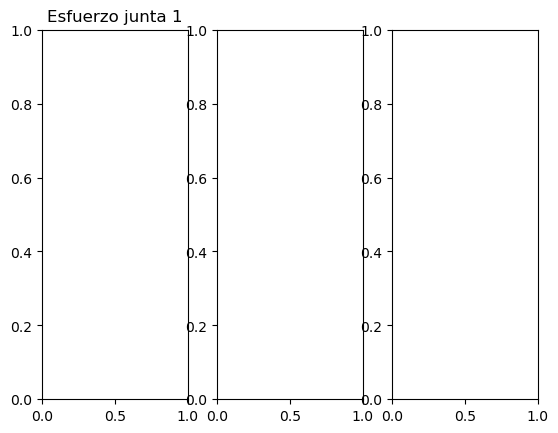

In [8]:
def main():
  generador_dinamica = GeneradorDinamica()
  generador_dinamica.cinematica_directa()
  generador_dinamica.generar_trayectoria()
  generador_dinamica.cinematica_inversa()
  generador_dinamica.graficar()
  generador_dinamica.graficar_ws()
  generador_dinamica.definir_inercia()
  generador_dinamica.generar_esfuerzos()
  generador_dinamica.graficar_esfuerzos()

if __name__ == "__main__":
  main()

### 4. Github
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

## ¿Qué utilidad tiene el modelo de dinámica inversa de un robot?
 
En la práctica 3, el modelo de **dinámica inversa** fue clave para calcular los **pares o torques** que cada articulación del robot necesita aplicar para **seguir una trayectoria deseada**, considerando no solo la posición, sino también la **aceleración, velocidad, masas e inercias** del sistema.
 
Este modelo se utilizó para **simular y controlar el movimiento realista** del robot, ya que permitió determinar las fuerzas internas necesarias para ejecutar correctamente los movimientos planeados por la cinemática.
 
### Utilidades observadas en la práctica:
 
- Permite conocer los **pares requeridos** en cada articulación para que el robot siga una trayectoria con ciertas aceleraciones y velocidades.
- Se considera el **efecto de la gravedad, la inercia y las fuerzas externas**, haciendo más precisa la simulación o el control.
- Permite **simular movimientos realistas**, comparando la respuesta dinámica del robot con diferentes entradas y configuraciones.
- Además permite la **visualización grafica** de los esfuerzos a través del tiempo, permitiendo una mejor comprensión  


## Conclusiones

La aplicación de la dinámica inversa fue fundamental para determinar los pares en cada articulación del robot, permitiendo así el seguimiento de trayectorias bajo condiciones dinámicas realistas, que incluyen factores como velocidad, aceleración y masas.

Además, las gráficas generadas por el programa proporcionaron una representación visual clara de las componentes y fuerzas en el sistema, lo que facilitó una mejor comprensión. Esta combinación teórica y gráfica no solo optimiza el diseño y control del robot, sino que también ayuda con el proceso de aprendizaje, captando de manera más efectiva las complejidades de la dinámica robótica.


## Bibliografía 

- `[1]` W. Colcha, J. Pilco y E. Garcés, *Dinámica Inversa de un Brazo Robótico*, Escuela Superior Politécnica de Chimborazo, 2021. [En línea]. Disponible: <https://es.scribd.com/document/583401409/Dinamica-Inversa-Brazo-Robotico>. [Accedido: 18 de mayo de 2025].

- `[2]` A. Jaramillo, *Dinámica de Robots*, California Institute of Technology. [En línea]. Disponible: <https://www.wag.caltech.edu/home/ajaramil/libro_robotica/dinamica.pdf>. [Accedido: 18 de mayo de 2025].
